Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

Import the data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

Text(0.5, 1.0, '5')

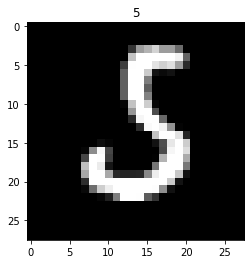

In [ ]:
plt.imshow(x_train[278], cmap = 'gray')
plt.title(y_train[278])

Normalize the data

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Reshape to add the number of layers

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

Build the neural network model

In [ ]:
# Object of model
model = Sequential()

# First pair of convolution and pooling
model.add(Conv2D(filters=32, input_shape=(28,28,1), activation='relu',
          kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# Second pair of convolution and pooling
model.add(Conv2D(filters=64, activation='relu', kernel_size = (3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# Third pair of convolution and pooling
# model.add(Conv2D(filters=64, activation='relu', kernel_size = (3,3)))
# model.add(MaxPool2D(pool_size=(2,2)))

# Flattening layer
model.add(Flatten())

# Add a hidden layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.1205 - accuracy: 0.9628
Epoch 2/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0418 - accuracy: 0.9868
Epoch 3/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 4/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0203 - accuracy: 0.9937
Epoch 5/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0164 - accuracy: 0.9946
Epoch 6/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 7/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 8/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 9/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 10/10
3000/3000 [==============================] - 11s 4ms/step - l

Evaluate on test data

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 24s 2ms/step - loss: 0.0411 - accuracy: 0.9913


[0.04109611734747887, 0.9912999868392944]

Predict on the unseen data

In [ ]:
new = x_test[1234]
new = new.reshape(28,28)

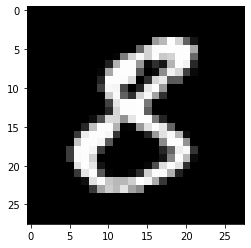

In [ ]:
plt.imshow(new, cmap='gray')

In [ ]:
new = new.reshape(1,28,28,1)

In [ ]:
np.argmax(model.predict(new, verbose=False))

8

Excercise

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


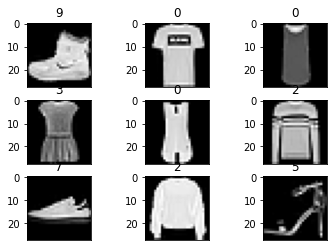

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.title(y_train[i])